# Data Science Academy (Projeto 2)<br>

## Fundamentos de Linguagem Python Para Análise de Dados e Data Science <br>

## Análise Exploratória de Dados em Linguagem Python Para a Área de Varejo <br>

## Importação de Bibliotecas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

C:\Users\Gabri\anaconda3\lib\site-packages\scipy\__init__.py:132: UserWarning: A NumPy version >=1.21.6 and <1.28.0 is required for this version of SciPy (detected version 1.21.5)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Carregando os Dados

In [3]:
# Carrega o dataset
df = pd.read_csv('dados/dataset.csv')

In [4]:
# Shape
df.shape

(9700, 11)

In [5]:
# Amostra dos dados
df.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


In [6]:
# Amostra dos dados
df.tail()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
9695,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,OFF-PA-10004569,Office Supplies,Paper,22.830
9696,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,OFF-AP-10000027,Office Supplies,Appliances,54.320
9697,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,TEC-PH-10000675,Technology,Phones,196.776
9698,CA-2017-105291,30/10/2017,SP-20920,Consumer,United States,San Luis Obispo,California,OFF-FA-10003059,Office Supplies,Fasteners,3.620
9699,CA-2018-147032,31/07/2018,LB-16795,Home Office,United States,Wilmington,Delaware,OFF-PA-10003256,Office Supplies,Paper,11.540


## Análise Exploratória

In [7]:
# Colunas do conjunto de dados
df.columns

Index(['ID_Pedido', 'Data_Pedido', 'ID_Cliente', 'Segmento', 'Pais', 'Cidade',
       'Estado', 'ID_Produto', 'Categoria', 'SubCategoria', 'Valor_Venda'],
      dtype='object')

In [8]:
# Verificando o tipo de dado de cada coluna
df.dtypes

ID_Pedido        object
Data_Pedido      object
ID_Cliente       object
Segmento         object
Pais             object
Cidade           object
Estado           object
ID_Produto       object
Categoria        object
SubCategoria     object
Valor_Venda     float64
dtype: object

In [9]:
# Resumo estatístico da coluna com o valor de venda
df['Valor_Venda'].describe()

count     9700.000000
mean       230.469892
std        627.504252
min          0.444000
25%         17.248000
50%         54.272000
75%        209.932500
max      22638.480000
Name: Valor_Venda, dtype: float64

In [10]:
# Verificando se há registros duplicados
df[df.duplicated()]

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda


In [11]:
# Verificando de há valores ausentes
df.isnull().sum()

ID_Pedido       0
Data_Pedido     0
ID_Cliente      0
Segmento        0
Pais            0
Cidade          0
Estado          0
ID_Produto      0
Categoria       0
SubCategoria    0
Valor_Venda     0
dtype: int64

In [12]:
df.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


## Pergunta de Negócio 1: <br>

### Qual Cidade com Maior Valor de Venda de Produtos da Categoria  'Office Supplies'?

In [14]:

df_ex1=df[df['Categoria']=='Office Supplies']
df_ex1=df_ex1.groupby('Cidade')['Valor_Venda'].sum()
valor_maximo=df_ex1.idxmax() # idxmax() retorna o index do valor da serie 
valor_maximo

'New York City'

## Pergunta de Negócio 2: <br>

### Qual o Total de Vendas Por Data do Pedido?



In [15]:
#Poderia usar series temporais.
df_teste=pd.to_datetime(df['Data_Pedido'],format='%d/%m/%Y')
df['Data_Pedido']=df_teste

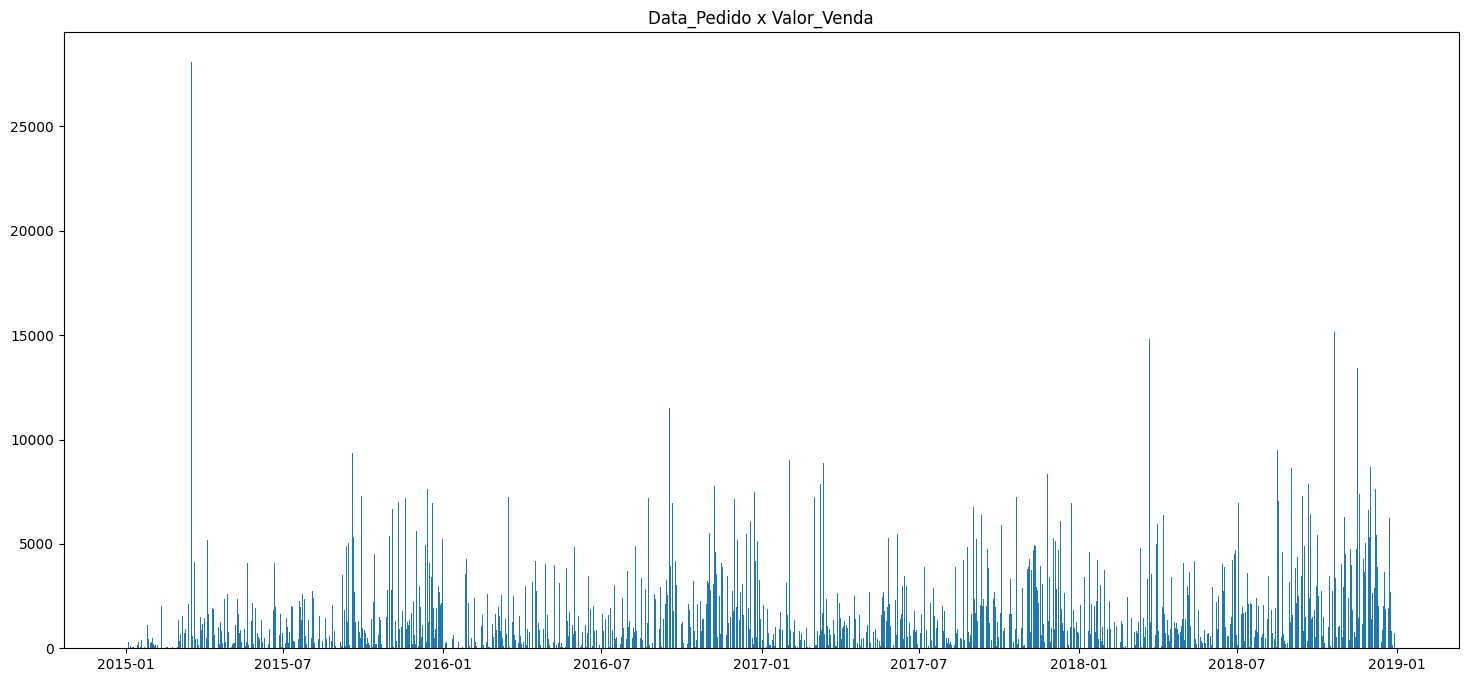

In [16]:
df_ex2=df.groupby('Data_Pedido')['Valor_Venda'].sum()
x=df_ex2.index
y=df_ex2.values

plt.figure(figsize=(18,8))
plt.bar(x,y)
plt.title('Data_Pedido x Valor_Venda')
plt.show()


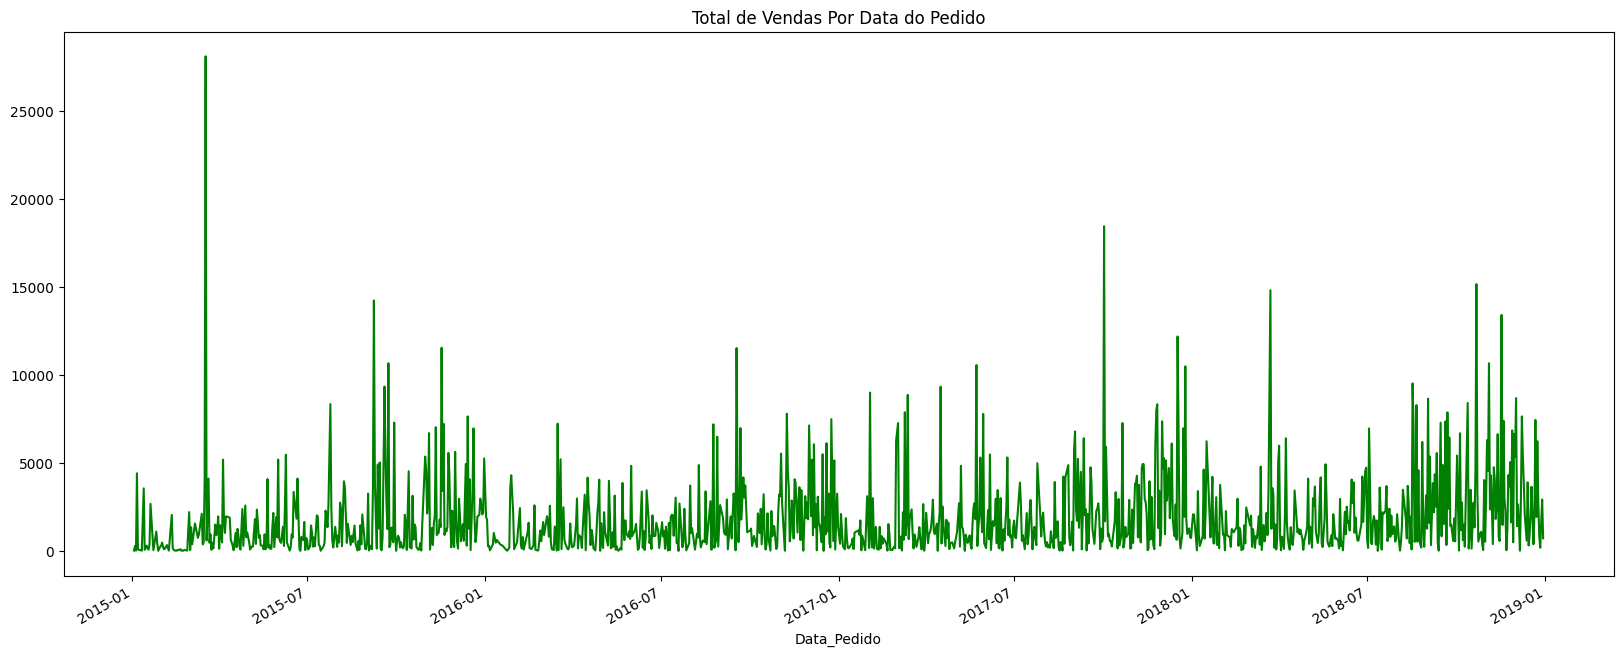

In [17]:
# outra forma de fazer utilizando o pandas para plotar
df_ex2=df.groupby('Data_Pedido')['Valor_Venda'].sum()
x=df_ex2.index
y=df_ex2.values

plt.figure(figsize=(20,8))
df_ex2.plot(x='Data_Pedido',y='Valor_Venda',color='green')
plt.title('Total de Vendas Por Data do Pedido')
plt.show()

## Pergunta de Negócio 3:<BR>

### Qual o Total de Vendas por Estado?



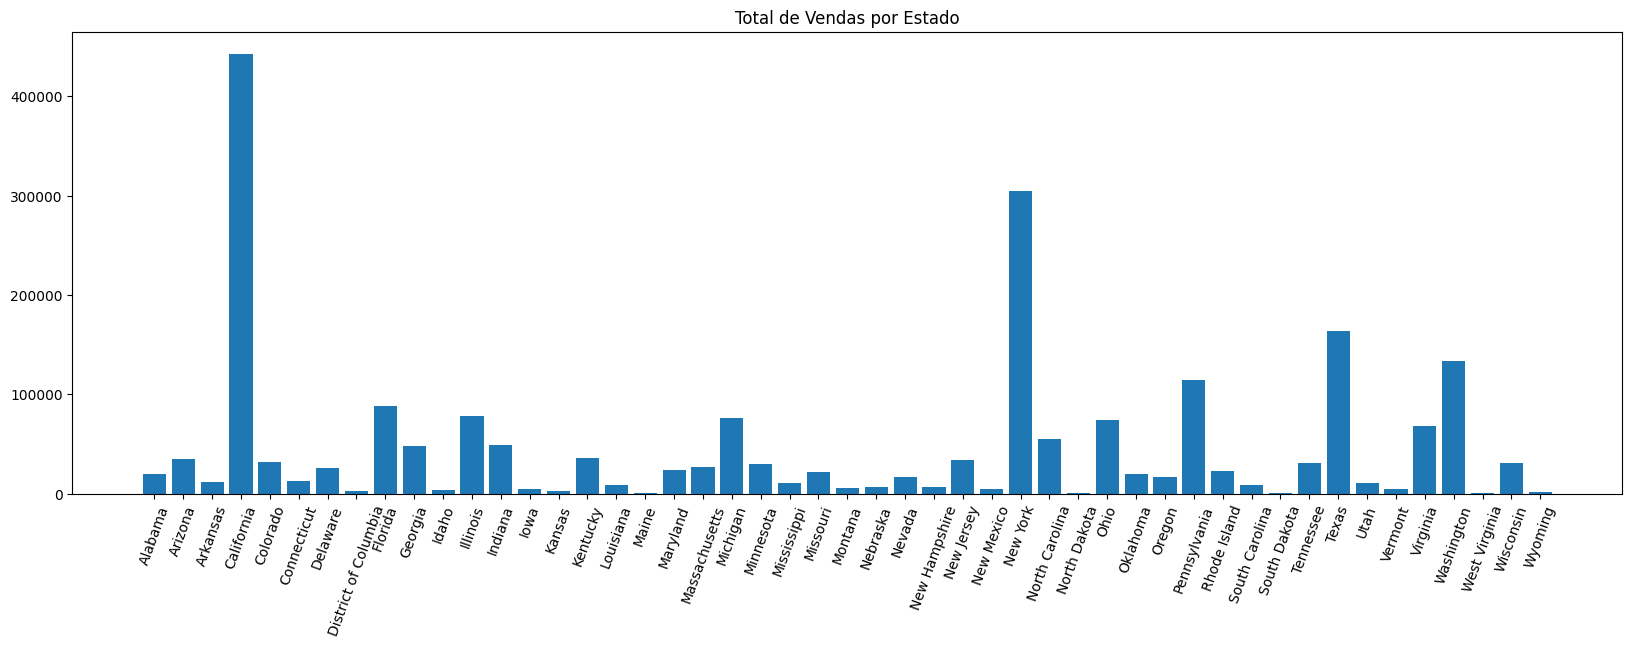

In [19]:
df_ex3=df.groupby('Estado')['Valor_Venda'].sum()

plt.figure(figsize=(20,6))
plt.bar(df_ex3.index,df_ex3.values)
plt.title('Total de Vendas por Estado')
plt.xticks(rotation=70)
plt.show()

## Pergunta de Negócio 4:<br>

### Quais São as 10 Cidades com Maior Total de Vendas?



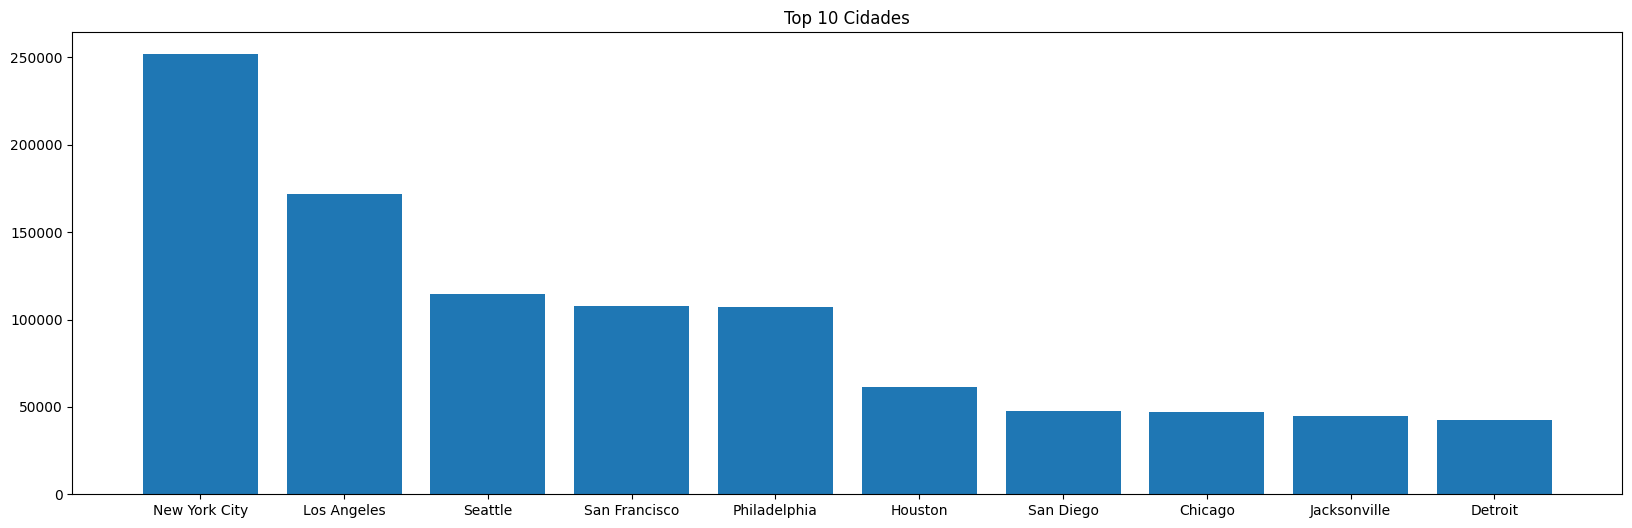

In [20]:
df_ex4=df.groupby('Cidade')['Valor_Venda'].sum()
df_ex4=df_ex4.sort_values(ascending=False)
df_ex4_top10=df_ex4.head(10)

plt.figure(figsize=(20,6))
plt.bar(df_ex4_top10.index,df_ex4_top10.values)
plt.title('Top 10 Cidades')
plt.show()


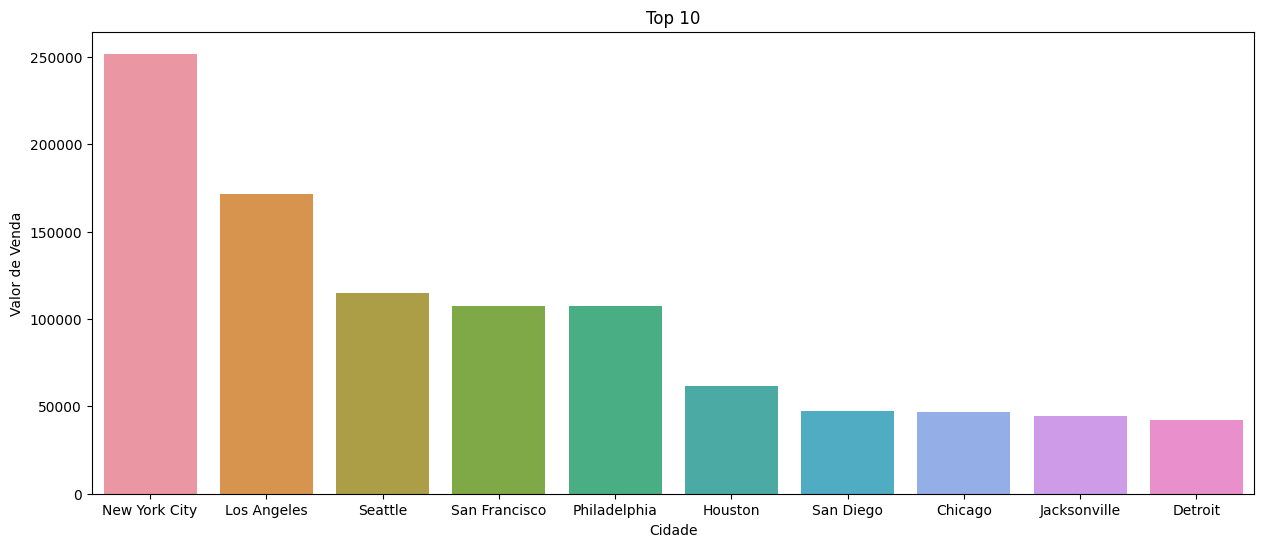

In [21]:
#Transformando uma serie em um dataframe
df_ex4=df.groupby('Cidade')['Valor_Venda'].sum()
df_ex4=df_ex4.reset_index()
df_ex4=df_ex4.sort_values(by='Valor_Venda',ascending=False)
df_ex4=df_ex4.round()
df_ex4_top10=df_ex4.head(10)

#o erro aqui acontece por que searborn vê o x como uma lista de string, o certo seria usar um dataframe.
plt.figure(figsize=(15, 6))
sns.set_palette('coolwarm')
ax = sns.barplot(data=df_ex4_top10, x='Cidade', y='Valor_Venda')
ax.set_title('Top 10', color='Black')
ax.set_xlabel('Cidade')
ax.set_ylabel('Valor de Venda')
# definir os rótulos para o eixo x
plt.show()

## Pergunta de Negócio 5: <br>

### Qual Segmento Teve o Maior Total de Vendas?


In [22]:
def autopct_format(values):
    def my_format(pct):
        total=sum(values)
        val=int(round(pct*total/100))
        return "${v:d}".format(v=val)
    return my_format

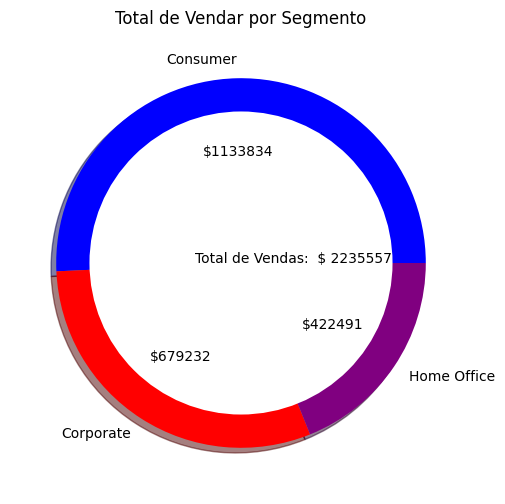

In [23]:
df_ex5=df.groupby('Segmento')['Valor_Venda'].sum()
df_ex5=df_ex5.reset_index()

plt.figure(figsize=(10,6))
plt.pie(df_ex5['Valor_Venda'],labels=df_ex5['Segmento'],colors=['Blue','Red','Purple'],shadow=True,
       autopct=autopct_format(df_ex5['Valor_Venda']))

centre_circle=plt.Circle((0,0),0.82,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre_circle)

plt.annotate(text='Total de Vendas: '+' $ ' + str(int(sum(df_ex5['Valor_Venda']))),xy=(-.25,0))
plt.title('Total de Vendar por Segmento')
plt.show()

In [24]:
def porcentagem(n):
    soma=sum(n)
    valor_retornado=[round((x/soma)*100,2) for x in n]
    return valor_retornado

<function matplotlib.pyplot.show(close=None, block=None)>

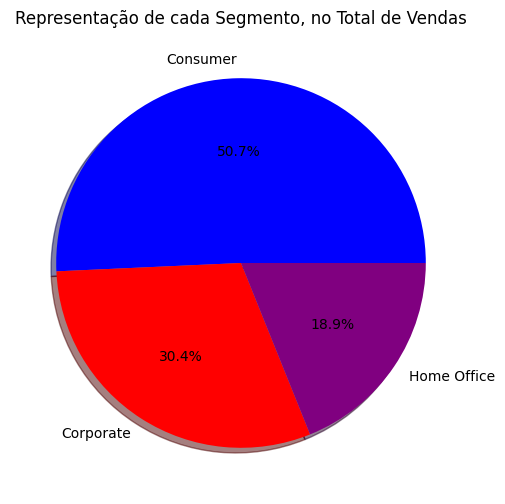

In [25]:
df_ex5=df.groupby('Segmento')['Valor_Venda'].sum()
df_ex5=df_ex5.reset_index()
df_ex5['Valor_Venda']=porcentagem(df_ex5['Valor_Venda'])

plt.figure(figsize=(10,6))
plt.pie(df_ex5['Valor_Venda'],labels=df_ex5['Segmento'],colors=['Blue','Red','Purple'],shadow=True,
       autopct='%1.1f%%')
plt.title('Representação de cada Segmento, no Total de Vendas')
plt.show

## Pergunta de Negócio 6 : <br>

### Qual o Total de Vendas Por Segmento e Por Ano?

In [26]:
df_ex6=df.copy()
df_ex6['Ano']=df_ex6['Data_Pedido'].dt.year
df_ano=df_ex6.pop('Ano') # Tira 'Ano' do DataFrame e salvo no variavel
df_ex6.insert(2,'Ano',df_ano)# Coloco "Ano"  no dataframe novamente, so que em outra posição

In [27]:
df_ex6=df_ex6.groupby(['Ano','Segmento'])['Valor_Venda'].sum().round()

In [28]:
df_ex6

Ano   Segmento   
2015  Consumer       256720.0
      Corporate      125820.0
      Home Office     88229.0
2016  Consumer       265295.0
      Corporate      114643.0
      Home Office     74134.0
2017  Consumer       288460.0
      Corporate      203267.0
      Home Office    103640.0
2018  Consumer       323360.0
      Corporate      235503.0
      Home Office    156489.0
Name: Valor_Venda, dtype: float64

## Pergunta de Negócio 7 : <br>

Os gestores da empresa estão considerando conceder diferentes faixas de descontos e gostariam de fazer uma simulação com base na regra abaixo:

- Se o Valor_Venda for maior que 1000 recebe 15% de desconto.
- Se o Valor_Venda for menor que 1000 recebe 10% de desconto.<br>

### Quantas Vendas Receberiam 15% de Desconto?

In [29]:
#Se o parametro for correto retorna 0.15 se não retorna 0.10
df['Desconto']=np.where(df['Valor_Venda']>1000,0.15,0.10)
df['Desconto'].value_counts()

0.10    9243
0.15     457
Name: Desconto, dtype: int64

In [30]:
df_ex7=df.copy()
df_ex7['Desconto15']=df['Valor_Venda']>1000
df_ex7['Desconto10']=df['Valor_Venda']<1000
Vendas_15=df_ex7.Desconto15.value_counts()[True]
Vendas_10=df_ex7.Desconto10.value_counts()[True]
print(f'Foram Feitas {Vendas_15} vendas com 15% de Desconto')
print(f'Foram Feitas {Vendas_10} vendas com 10% de Desconto')

Foram Feitas 457 vendas com 15% de Desconto
Foram Feitas 9243 vendas com 10% de Desconto


## Pergunta de Negócio 8 : <br>
 
### Considere Que a Empresa Decida Conceder o Desconto de 15% do Item Anterior. Qual Seria a Média do Valor de Venda Antes e Depois do Desconto?

In [31]:
valor_maior100 = df.loc[df['Valor_Venda'] > 1000, 'Valor_Venda']
media_antes=valor_maior100.mean()
media_depois=(valor_maior100*0.85).mean()
print(media_depois)
print(media_antes)

1799.2866430196952
2116.8078153172864


## Pergunta de Negócio 9: <br>

### Qual o Média de Vendas Por Segmento, Por Ano e Por Mês?



In [32]:
df_ex9=df.copy()
df_ex9['Ano']=df['Data_Pedido'].dt.year
df_ex9['Mes']=df['Data_Pedido'].dt.month
df_ex9=df_ex9.groupby(['Ano','Mes','Segmento'])['Valor_Venda'].mean()
df_ex9=df_ex9.reset_index()

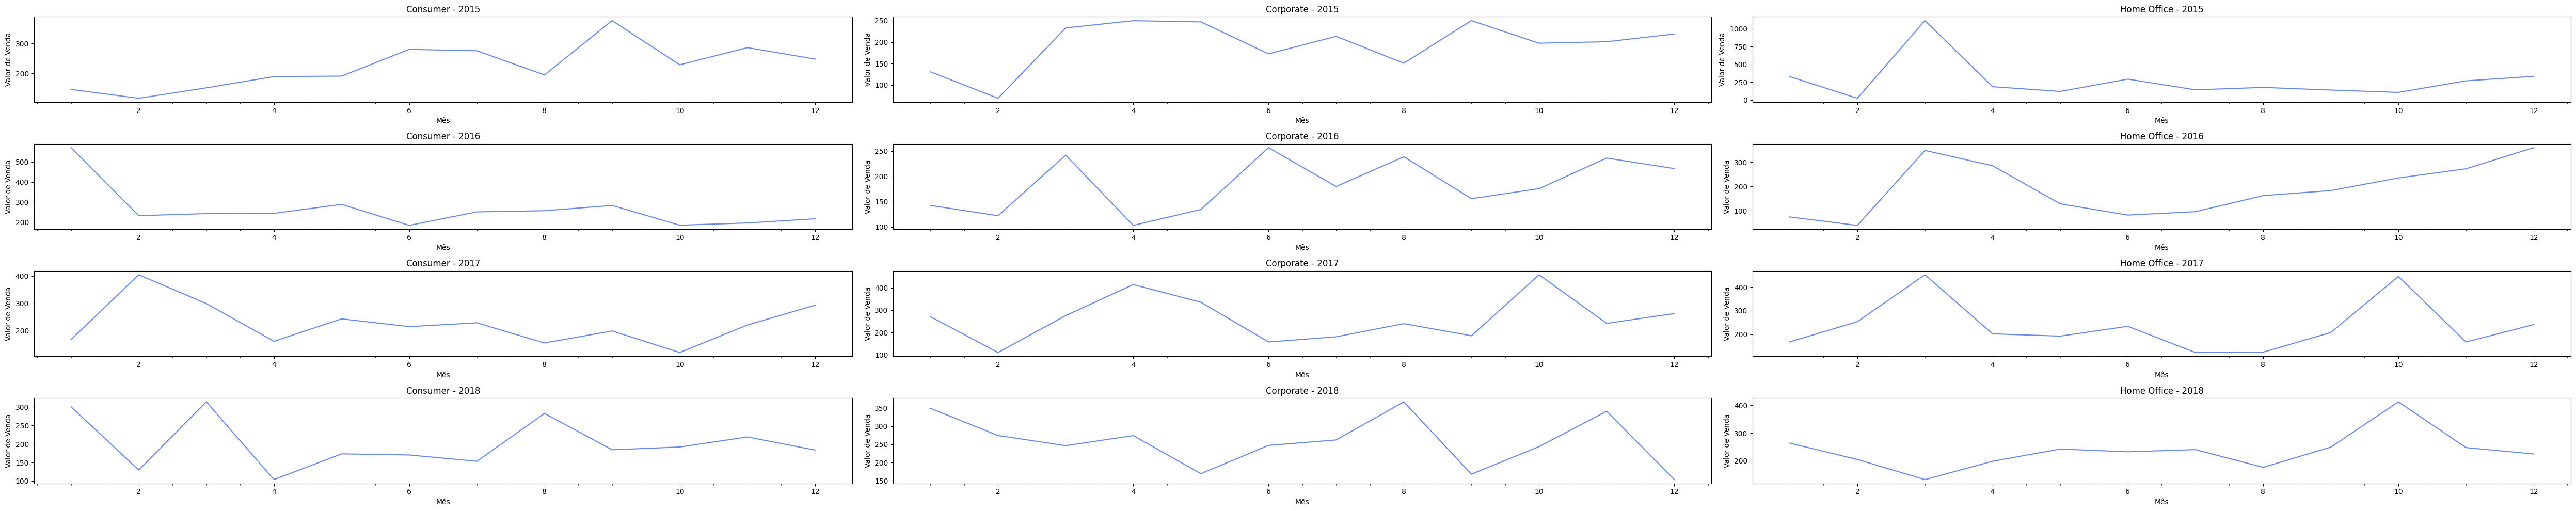

In [33]:
import matplotlib as mpl
mpl.rcParams['xtick.minor.visible'] = True

tipos_de_segmentos = df_ex9['Segmento'].value_counts().index
meses = df_ex9['Mes'].value_counts().index
anos = df_ex9['Ano'].value_counts().index

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(50, 10)) # Ajuste o tamanho da figura conforme necessário

for i, ano in enumerate(anos):
    for j, segmento in enumerate(tipos_de_segmentos):
        consumermeses = df_ex9.loc[(df_ex9['Segmento'] == segmento) & (df_ex9['Ano'] == ano), 'Valor_Venda']
        ax = axes[i, j]
        ax.plot(meses, consumermeses)
        ax.set_title(f"{segmento} - {ano}") # Adicione um título a cada subplot
        ax.set_xlabel("Mês")
        ax.set_ylabel("Valor de Venda")
        
plt.tight_layout() # Ajuda a organizar os subplots
plt.show()

## Pergunta de Negócio 10:<br>

### Qual o Total de Vendas Por Categoria e SubCategoria, Considerando Somente as Top 12 SubCategorias? 



In [63]:
df_12subcat=df.groupby('SubCategoria')['Valor_Venda'].sum().nlargest(12)
df_subcat = df.loc[df['SubCategoria'].isin(df_12subcat.index)]
df_ex10 = df_subcat.groupby(['Categoria','SubCategoria'])['Valor_Venda'].sum().reset_index()

In [68]:
df_heatmap

SubCategoria,Accessories,Appliances,Binders,Bookcases,Chairs,Copiers,Furnishings,Machines,Paper,Phones,Storage,Tables
Categoria,,,,,,,,,,,,
Furniture,NaN,NaN,NaN,108045.0467,317919.625,NaN,88862.77,NaN,NaN,NaN,NaN,202083.36
Office Supplies,NaN,104061.693,194723.381,NaN,NaN,NaN,NaN,NaN,76312.764,NaN,216188.362,NaN
Technology,162791.362,NaN,NaN,NaN,NaN,146248.094,NaN,189238.631,NaN,325271.294,NaN,NaN


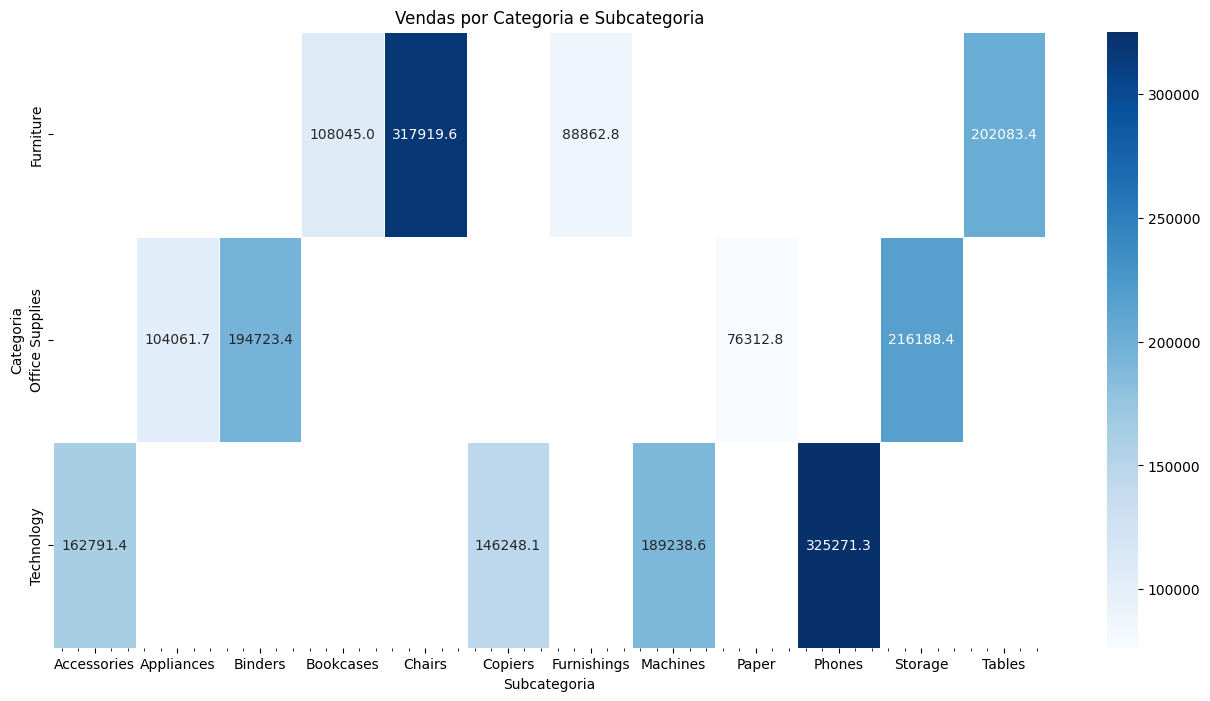

In [64]:
df_heatmap = df_ex10.pivot('Categoria', 'SubCategoria', 'Valor_Venda')

# Plota o heatmap
plt.figure(figsize=(16, 8))
sns.heatmap(df_heatmap, annot=True, fmt=".1f", linewidths=.5, cmap='Blues')
plt.title('Vendas por Categoria e Subcategoria')
plt.xlabel('Subcategoria')
plt.ylabel('Categoria')
plt.show()

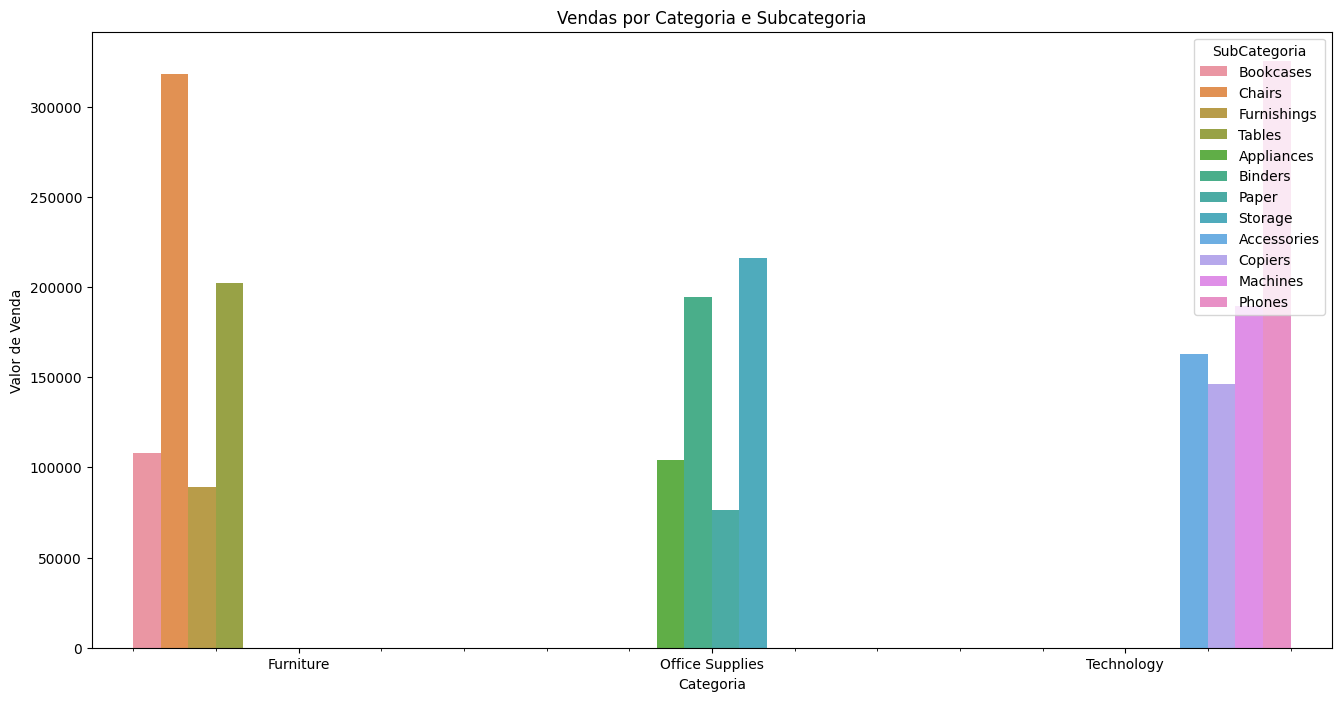

In [65]:
plt.figure(figsize=(16, 8))
sns.barplot(data=df_ex10, x='Categoria', y='Valor_Venda', hue='SubCategoria')
plt.title('Vendas por Categoria e Subcategoria')
plt.xlabel('Categoria')
plt.ylabel('Valor de Venda')
plt.show()

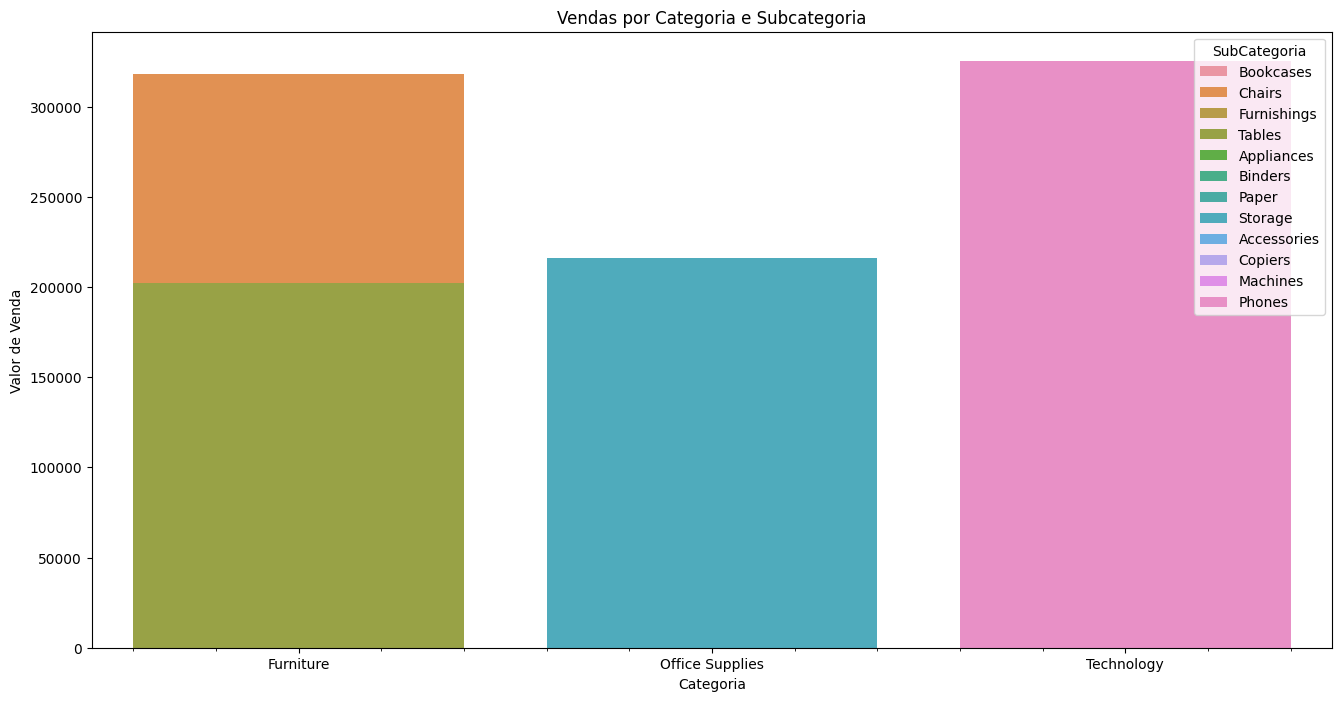

In [66]:
plt.figure(figsize=(16, 8))
sns.barplot(data=df_ex10, x='Categoria', y='Valor_Venda', hue='SubCategoria', dodge=False)
plt.title('Vendas por Categoria e Subcategoria')
plt.xlabel('Categoria')
plt.ylabel('Valor de Venda')
plt.show()

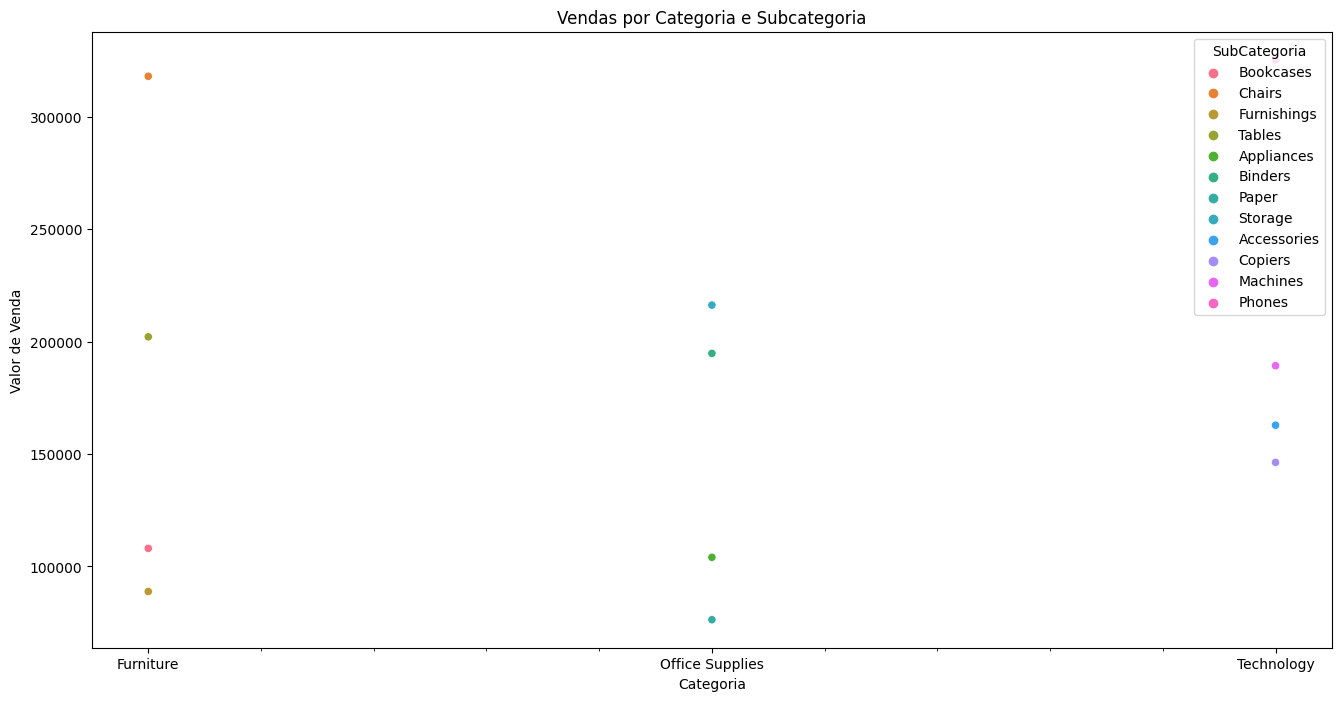

In [67]:
df_ex10 = df_subcat.groupby(['Categoria', 'SubCategoria'])['Valor_Venda'].sum().reset_index()

# Plota o gráfico de pontos
plt.figure(figsize=(16, 8))
sns.scatterplot(data=df_ex10, x='Categoria', y='Valor_Venda', hue='SubCategoria')
plt.title('Vendas por Categoria e Subcategoria')
plt.xlabel('Categoria')
plt.ylabel('Valor de Venda')
plt.show()